# CNN Architectures - Vgg16, MobileNetV2 for Plant Disease Detection trained on Plant Village Dataset

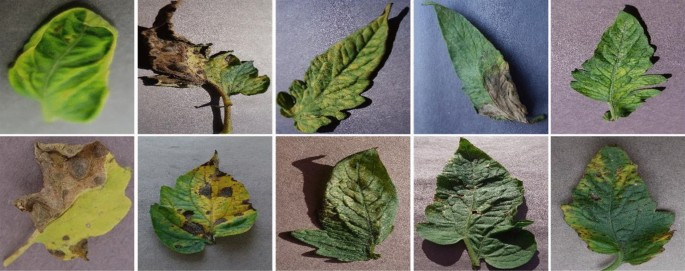

Loading Data

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! kaggle datasets download -d divyanshusingh18/plant-village

100% 900M/901M [00:51<00:00, 22.3MB/s]
100% 901M/901M [00:51<00:00, 18.2MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/plant-village.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Libraries

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

Preprocessing Data

In [7]:
train_directory = '/content/train_directory'
test_directory = '/content/test_directory'
validation_directory = '/content/validation_directory'


batch_size = 32
image_size = (224, 224)


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,

)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

batch_size = 32
image_size = (224, 224)

# Training Data Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

# Test Data Generator
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 39333 images belonging to 39 classes.
Found 9846 images belonging to 39 classes.
Found 12307 images belonging to 39 classes.


In [8]:
class_names = train_generator.class_indices

class_labels = list(class_names.keys())

print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [9]:
num_classes = train_generator.num_classes

VGG 16

In [10]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)


model1 = Model(inputs=base_model.input, outputs=output)


model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)



Epoch 1/20
1230/1230 [==============================] - 222s 168ms/step - loss: 1.3512 - accuracy: 0.6271 - val_loss: 0.5959 - val_accuracy: 0.8426
Epoch 2/20
1230/1230 [==============================] - 205s 167ms/step - loss: 0.6181 - accuracy: 0.8103 - val_loss: 0.4213 - val_accuracy: 0.8740
Epoch 3/20
1230/1230 [==============================] - 206s 167ms/step - loss: 0.4861 - accuracy: 0.8462 - val_loss: 0.3516 - val_accuracy: 0.8890
Epoch 4/20
1230/1230 [==============================] - 205s 167ms/step - loss: 0.4131 - accuracy: 0.8667 - val_loss: 0.3012 - val_accuracy: 0.9073
Epoch 5/20
1230/1230 [==============================] - 205s 166ms/step - loss: 0.3763 - accuracy: 0.8761 - val_loss: 0.2708 - val_accuracy: 0.9151
Epoch 6/20
1230/1230 [==============================] - 205s 167ms/step - loss: 0.3471 - accuracy: 0.8856 - val_loss: 0.2855 - val_accuracy: 0.9046
Epoch 7/20
1230/1230 [==============================] - 205s 167ms/step - loss: 0.3227 - accuracy: 0.8936 - val_

In [13]:
model1.save('plant_village_vgg_16_colab.h5')

In [14]:

test_loss, test_accuracy = model1.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

385/385 [==============================] - 56s 144ms/step - loss: 0.1730 - accuracy: 0.9404
Test Loss: 0.1730
Test Accuracy: 0.9404


##### MobileNet V2

In [15]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model4 = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 [==============================] - 2s 0us/step


In [17]:
model4.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model4.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/20
1230/1230 [==============================] - 100s 78ms/step - loss: 0.5272 - accuracy: 0.8401 - val_loss: 0.2111 - val_accuracy: 0.9300
Epoch 2/20
1230/1230 [==============================] - 93s 75ms/step - loss: 0.2821 - accuracy: 0.9075 - val_loss: 0.1636 - val_accuracy: 0.9458
Epoch 3/20
1230/1230 [==============================] - 90s 73ms/step - loss: 0.2409 - accuracy: 0.9214 - val_loss: 0.1838 - val_accuracy: 0.9419
Epoch 4/20
1230/1230 [==============================] - 90s 73ms/step - loss: 0.2205 - accuracy: 0.9278 - val_loss: 0.1724 - val_accuracy: 0.9439
Epoch 5/20
1230/1230 [==============================] - 92s 75ms/step - loss: 0.1967 - accuracy: 0.9369 - val_loss: 0.1478 - val_accuracy: 0.9521
Epoch 6/20
1230/1230 [==============================] - 91s 74ms/step - loss: 0.1888 - accuracy: 0.9392 - val_loss: 0.1579 - val_accuracy: 0.9527
Epoch 7/20
1230/1230 [==============================] - 97s 79ms/step - loss: 0.1683 - accuracy: 0.9446 - val_loss: 0.1568 

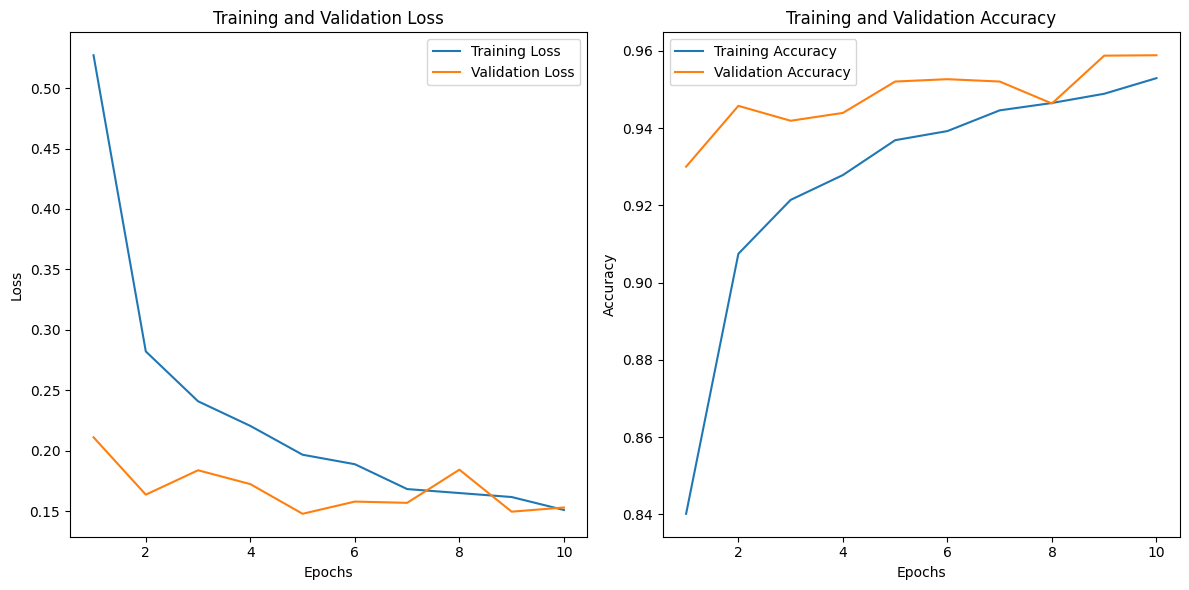

In [20]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
model4.save('plant_village_MobileNetV2_colab.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:

test_loss, test_accuracy = model4.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

385/385 [==============================] - 25s 65ms/step - loss: 0.1543 - accuracy: 0.9487
Test Loss: 0.1543
Test Accuracy: 0.9487
